# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 38
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [3]:
df = pd.DataFrame()
df["reviews"] = reviews

df.head()


,reviews
0,✅ Trip Verified | Boarding was difficult caus...
1,✅ Trip Verified | Boarding started with a del...
2,✅ Trip Verified | Absolutely horrible custome...
3,Not Verified | BA is not what it used to be! ...
4,"✅ Trip Verified | BA First, it's not even the..."


Now we have our dataset for this task! The loops above collected 3765 reviews by iterating through the paginated pages on the website.  The next thing that we should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [4]:

# Define a function to extract verification status and remove it from the review
def extract_verification(review):
    if review.startswith('✅ Trip Verified |'):
        return 'Verified', review.replace('✅ Trip Verified |', '')
    elif review.startswith('Not Verified |'):
        return 'Not Verified', review.replace('Not Verified |', '')
    else:
        return None, review

# Apply the function to the 'reviews' column
df['verification_status'], df['reviews'] = zip(*df['reviews'].map(extract_verification))

df.head()

,reviews,verification_status
0,Boarding was difficult caused by vast majori...,Verified
1,Boarding started with a delay of some 20 min...,Verified
2,Absolutely horrible customer service - will ...,Verified
3,BA is not what it used to be! As much as I l...,Not Verified
4,"BA First, it's not even the best business cl...",Verified


### Sentiment Analysis

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


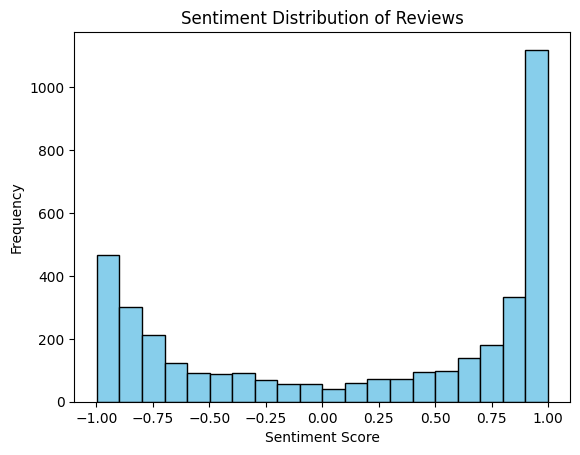

In [5]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis
df['sentiment_score'] = df['reviews'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Plot sentiment distribution
plt.hist(df['sentiment_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.savefig('sentiment_analysis.png')
plt.show()


The x-axis shows the sentiment score, ranging from -1.00 (most negative) to 1.00 (most positive). The y-axis shows the frequency of reviews.

Looking at the graph, it appears that the majority of reviews are positive. The sentiment score with the highest frequency is 1, which means highly positive.  However, there are also negative reviews, with a sizable amount scoring -0.75 and -1.

Overall, this sentiment analysis suggests that British Airways receives more positive reviews than negative reviews on Skytrax. However, it also shows that there is a mix of opinions, and that some customers have had negative experiences.

### Topic Modelling

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Initialize CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Fit and transform the review data
X = vectorizer.fit_transform(df['reviews'])

# Initialize LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)

# Fit LDA to the transformed review data
lda.fit(X)

# Function to display top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Display the topics
no_top_words = 10
feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names, no_top_words)


Topic 1:
flight ba airways british london told hours customer service check
Topic 2:
flight ba crew food cabin service meal class passengers staff
Topic 3:
flight good crew food time service lounge ba cabin lhr
Topic 4:
seat ba seats flight class business economy service british airways
Topic 5:
flight time minutes airways british crew check heathrow bag late


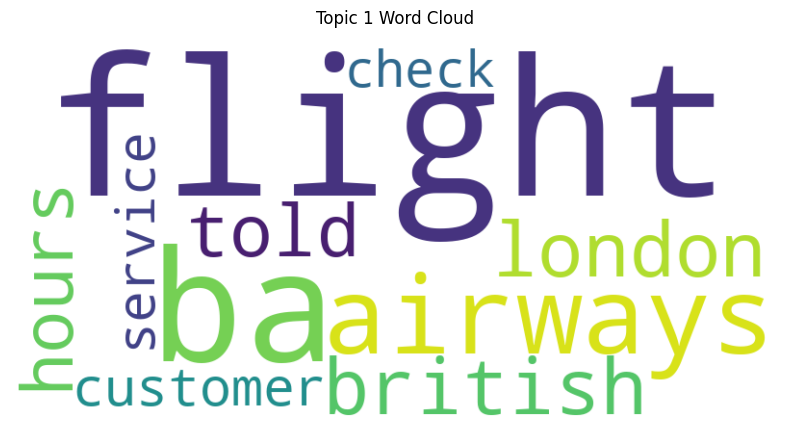

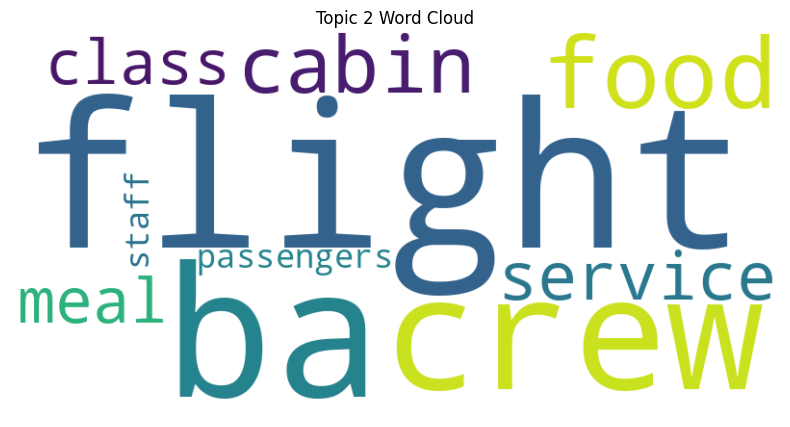

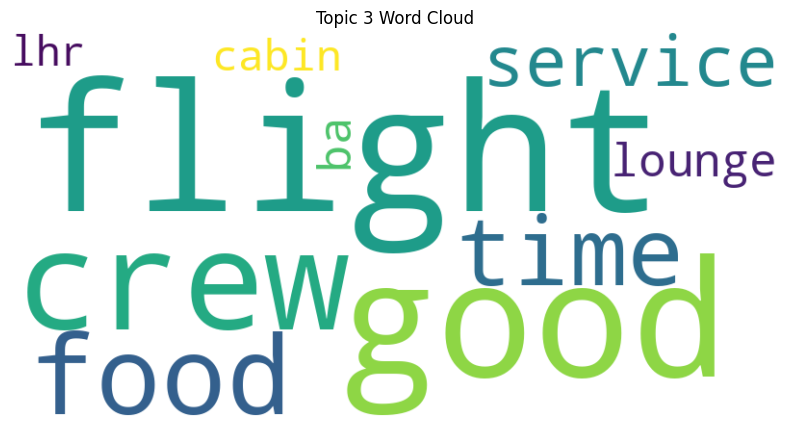

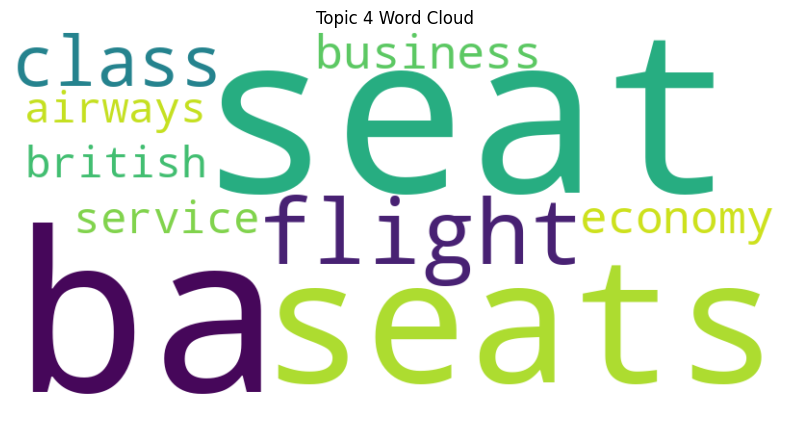

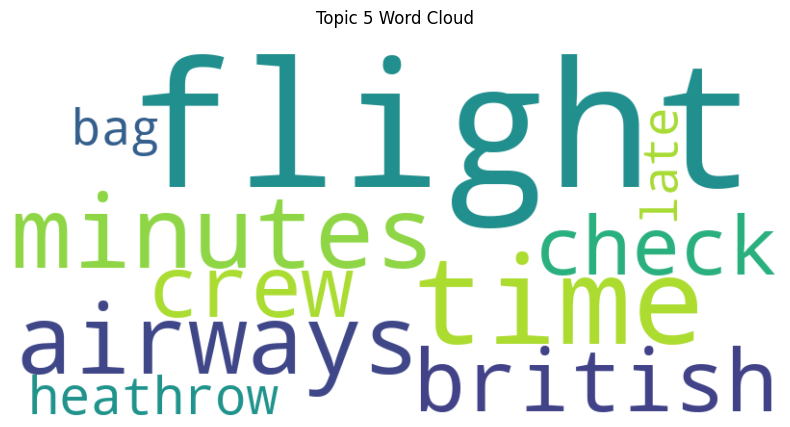

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud for each topic
def generate_word_cloud(lda_model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(lda_model.components_):
        topic_words = {feature_names[i]: topic[i] for i in topic.argsort()[:-no_top_words - 1:-1]}
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Topic {topic_idx+1} Word Cloud')
        plt.axis('off')
        plt.savefig(f'topic_{topic_idx+1}_wordcloud.png')
        plt.show()

# Generate word cloud for each topic
generate_word_cloud(lda, feature_names, no_top_words)


#### Topic 1:

**Travel:** Words like "flight", "seats", and "cabin" are all related to the travel experience itself. This suggests that a significant portion of reviews focus on the flight itself, which is to be expected for airline reviews.

**Comfort:** Words like "good seat" and "crew" might be related to passenger comfort during the flight. Passengers may be commenting on legroom, seat quality, or attentiveness of flight attendants.

**Food:** "Food" is a frequent word, suggesting that in-flight meals are a common topic of reviews.

#### Topic 2:

This topic is likely depicting a topic related to the boarding process and baggage handling for British Airways flights. Here's a breakdown of the relevant words:

**Boarding:** "Boarding", "gate", "seat check" all directly relate to the boarding process.

**Staff:** This could refer to general airline staff or specifically boarding gate staff.

**Bags":** "Bag", "carry", and "did" in this context likely refer to passengers' carry-on luggage and whether they were allowed to bring them on board.

Looking at these terms together, it suggests that this topic likely discusses passenger experiences with  carry-on luggage at the boarding gate.  Here are some possible scenarios this topic captures:

* Passengers being told they cannot bring their carry-on bags on the flight due
to lack of space.
* Passengers having to gate-check their carry-on bags.
* Confusion around the size or weight restrictions for carry-on luggage.
* Interactions with boarding gate staff concerning carry-on luggage.


#### Topic 3:

The words included suggest it likely centers around in-flight experience and service. Here's a breakdown of the key terms:

**General flight experience:** "Flight", "good", "BA" (British Airways)
**Service:** "Service", "crew"
**Comfort:** "Seat", "cabin"
**Amenities:** "Club", "lounge" (although "club" could also refer to business class)

Since "good" is a prominent word, this topic likely captures reviews that focus on positive aspects of in-flight service provided by British Airways' crew. Passengers may be commenting on attentiveness, friendliness, or helpfulness of cabin crew.  Words like "seat", "cabin", "club", and "lounge" could further indicate reviews mentioning comfortable seating, spacious cabins, or positive experiences in premium cabins or airport lounges.

Overall, this topic likely represents reviews that highlight the positive aspects of the in-flight service and comfort offered by British Airways.

#### Topic 4:

It appears to be related to travel to or from London Heathrow Airport (LHR). Here's a breakdown of the key terms:

**Location:** "London", "Heathrow" (Heathrow Airport)
**Airline:** "British Airways", "BA"
**Services:** "Check", "service"
**Time:** "Time", "hours"

Based on these words, this topic likely captures reviews that focus on the experience of using British Airways at London Heathrow Airport, specifically regarding check-in, wait times, or overall customer service.

Here are some possible interpretations of this topic:

* Efficiency of check-in process at Heathrow Airport for British Airways flights. This could include comments on long waiting times, queues, or ease of using kiosks or mobile check-in.
* Customer service experiences at Heathrow Airport. This might encompass interactions with staff at check-in desks, baggage claim, or other touchpoints.
* Travel time This could be related to specific routes or layovers at Heathrow Airport.

#### Topic 5:

It likely centers around the different travel classes offered by British Airways. Here's a breakdown of the key terms:

**Class:** This is the most prominent word, and it directly refers to travel class.
**Airlines:** "British Airways", "BA"
**Seat types:** "Seat", "seats", "economy", "business"

Since "class" is the most important word, this topic likely captures reviews that focus on comparisons between different classes of service on British Airways flights,  or reviews that specifically mention customer experiences in a particular class (economy or business).

Here are some possible interpretations of this topic:

* Reviews comparing economy and business class on British Airways. This could include comments on seat comfort, legroom, amenities, food service, or other aspects that differ between the classes.
* Reviews specifically mentioning economy or business class. Passengers may be commenting on their experience flying in a particular class, such as positive remarks about legroom in economy class or negative remarks about food quality in business class.